# Визуализация данных с помощью Matplotlib

**Matplotlib** --- свободная кроссплатформенная библиотека на языке Python с открытым кодом, предназначенная для визуализации числовых данных с помощью двумерной графики. Поддерживается также простая трёхмерная графика и создание анимации. Первая версия библиотеки вышла в 2003 году. Официальный сайт с документацией находится по адресу [matplotlib.org](https://matplotlib.org/).

Изначально библиотека разрабатывалась как дополнение к пакету IPython для предоставления пользователю MATLAB-подобного командного интерфейса для построения графиков. Однако при поддержке и финансировании Space Telescope Science Institute пакет очень быстро развился в самостоятельный программный продукт. 

Библиотека Matplotlib построена на массивах NumPy, следуя объектно-ориентированной парадигме. Однако имеется и процедурный интерфейс pylab. Как правило, используется в связке с другими библиотеками Python для научной работы и анализа данных: NumPy, SciPy, Pandas и другими.

Несомненным преимуществом библиотеки является то, что пользователь может настраивать по собственному желанию **абсолютно любой** аспект графика --- от шрифтов на осях и размера меток до цветовых схем. На основе Matplotlib созданы другие библиотеки визуализации с более высокоуровневым и современным интерфейсом (например, Seaborn, ggpy, HoloViews, Altair).

Получаемые с помощью Matplotlib изображения могут быть сконвертированы во множество графических форматов (как растровых, так и векторных) и использованы в качестве иллюстраций в публикациях.

## Импорт библиотеки и модуля plt

Стандартные сокращения для библиотеки Matplotlib и её наиболее часто вызываемого модуля pyplot: **mpl**, **plt**.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Версия библиотеки
mpl.__version__

'3.0.3'

## Отображение графиков

Начнём с особенностей отображения графиков в различных режимах. 

### Рисование из скрипта

Если вы используете IDE и пишете скрипт на Python (например, my_script.py в IDLE, Spyder, PyCharm и т. д.), то для отображения графика будет нужна команда **plt.show()**. Например:

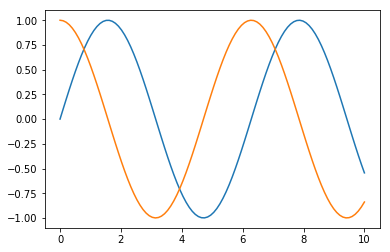

In [3]:
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show() # в блокнотах эта команда не является обязательной

### Рисование из блокнота

Однако если вы пишете код в интерактивном режиме или блокноте Jupyter, то вызов **plt.show()** не обязателен.

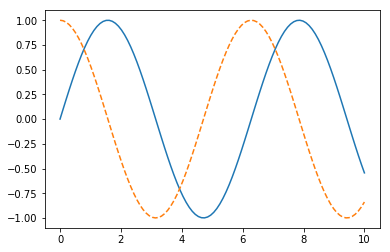

In [6]:
import numpy as np
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

Здесь мы видим особенность: перед картинкой появляется непонятный текст, похожий на сообщение об ошибке. Чтобы он не отображался, нужно завершить последнюю команду в ячейке точкой с запятой:

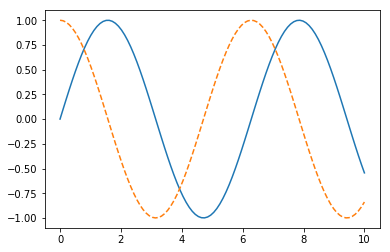

In [7]:
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

## Сохранение в файл

Для сохранения в файл используется метод **savefig()**, применённый к объекту класса **figure** (изображение). Минимальная последовательность действий такова:

- создаём экземпляр fig класса figure() с помощью конструктора;
- рисуем наши графики;
- применяем метод savefig() для объекта fig.

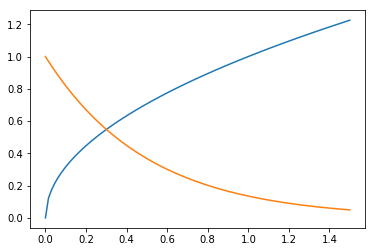

In [10]:
import numpy as np
x = np.linspace(0, 1.5, 100)

fig = plt.figure() # step 1

plt.plot(x, np.sqrt(x)) # step 2
plt.plot(x, np.exp(-2*x)) # step 2

fig.savefig('my_first_picture.png'); # step 3

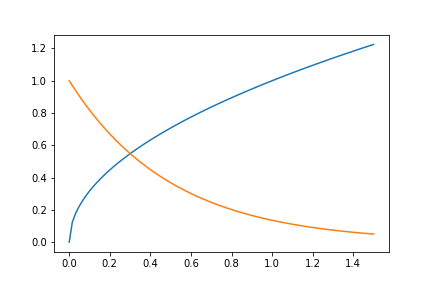

In [11]:
# Как просмотреть файл?
from IPython.display import Image
Image('my_first_picture.png')

### В каких форматах можно сохранять изображение?

In [12]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## MATLAB-style vs. Python-style

Как уже было отмечено, первоначально прикладной программный интерфейс (API) библиотеки Matplotlib задумывался как альтернатива MATLAB и автор стремился сделать его максимально похожим на оригинал. Однако затем библиотека получила объектно-ориентированный API. Покажем их различия на примере.

В целом объект **Figure** (рисунок, изображение) представляет из себя "контейнер" с такими компонентами, как **оси координат, собственно график, подписи и метки**. При этом на одном рисунке (figure) иногда удобно (и необходимо) отображать несколько графиков в одной или разных системах координат. Например, мы хотим отобразить графики $\sin x$ и $\cos x$ один под другим. В Matplotlib этого можно добиться двумя способами:

### MATLAB-стиль

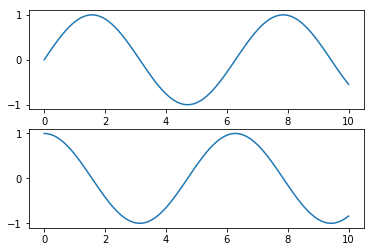

In [14]:
x = np.linspace(0, 10, 100)

plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

### ООП-стиль

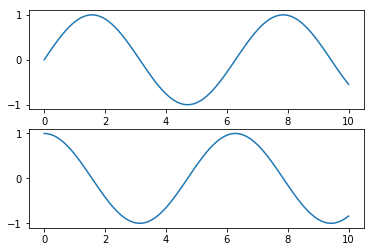

In [15]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

Преимуществом ООП-стиля является то, что изменить/добавить содержимое любой из частей изображения можно в любой момент, в то время как в случае MATLAB-стиля программирования вы работаете в текущий момент только с одним компонентом картинки.

## Простые графики $y=f(x)$